# Objectives

In [2]:
# Load the data and libraries

import pandas as pd
import numpy as np

filename = 'C:\\Users\\melan\\anaconda3\\PyCharmProject\\EdxCourse\\module5_auto.csv'
df = pd.read_csv(filename)

In [3]:
df.to_csv('module5_auto_reimport.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
# First lets use only numeric data using the function ._get_numeric_data()

df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [7]:
%%capture
from ipywidgets import interact, interactive, fixed, interact_manual

# Functions for Plotting

In [8]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    lenght = 10
    plt.figure(figsize=(width, lenght))
    
    ax1 = sns.distplot(RedFunction, hist= False, color= "r", label= RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color= "b", label= BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of cars')
    
    plt.legend()
    plt.show()
    plt.close()

In [9]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    plt.figure(figsize=(12,10))
    
    # xtrain, y_train: training data
    # xtest, y_test: testing data
    # lr: Linear Regression object
    # poly_transform: Polynomial Transformation object
    
    xmax= max([xtrain.values.max(), xtest.values.max()])
    xmin= min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label= 'Training Data')
    plt.plot(xtest, y_test, 'go', label= 'Testing Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label= 'Predicted Function')
    plt.ylim(-10000, 60000)
    plt.ylabel('Price')
    plt.legend()

# Part 1: Training and Testing

In [10]:
# An important step in testing your model is to split your data into training and testing data. 
# We will place the target data "price" in a separate dataframe "y_data":

In [11]:
y_data = df['price']

In [12]:
# Drop price data in dataframe x_data:

x_data = df.drop('price', axis= 1)

# Now, we randomly split our data into training and testing data using the function train_test_split.

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.10, random_state=1)

# x_data: features or independent variables
# y_data: dependent variable or target: df['price']
# x_train, y_train: parts of available data as training set
# x_test, y_test: parts of available data as testing set
# test_size: % of data for the testing set (here 10%)
# random_state: number generator used for random sampling 
#---> if random_state = None : Calling the function multiple times will produce different results.
#---> if random_state = Integer : Will produce the same results across different calls


print("number of test samples is", x_test.shape[0])
print("number of training samples is", x_train.shape[0])

number of test samples is 21
number of training samples is 180


# Exercise

In [14]:
# Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. 
# Set the parameter "random_state" equal to zero. 
# The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples is", x_test1.shape[0]) # shape = 0, it refers to "x_data" 
print("number of training samples is:", x_train1.shape[0])

number of test samples is 81
number of training samples is: 120


# Import Linear Regression module

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Create a Linear Regression object
lre = LinearRegression()

In [17]:
# Fit the model using 'horsepower'
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [18]:
# calculate R² on the test data
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [19]:
# What is the R² on the train data?
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [20]:
# We can see that R² is much smaller for the test data than for the train data.

# Exercise: Find the R^2 on the test data using 40% of the dataset for testing

In [21]:
lre1 = LinearRegression()

In [22]:
# Re-use the above train_test_split with the test_size = 0.4
lre1.fit(x_train1[['horsepower']], y_train1)

LinearRegression()

In [23]:
# Calculate R² of the Test modelonly:

lre1.score(x_test1[['horsepower']], y_test1)
lre1.score(x_train1[['horsepower']], y_train1)

print("the R² of the test model is:", lre1.score(x_test1[['horsepower']], y_test1))
print("the R² of the train model is: ", lre1.score(x_train1[['horsepower']], y_train1))

the R² of the test model is: 0.7139364665406973
the R² of the train model is:  0.5754067463583004


# Cross-validation

# Let's import model_selection from the module cross_val_score.

In [27]:
from sklearn.model_selection import cross_val_score

# Input object, the feature, target and cv (the number of folds)

In [30]:
R_cross = cross_val_score(lre, x_data[['horsepower']], y_data, cv= 4) #define the feature from x_data!!

# the first input parameter is the model we are using to do the cross-validation (lre)
# x_data is the predictive variable data
# y_data is the target data
# cv = the number of partition, in this case the data set is split into 4 equal partitions

In [31]:
# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
R_cross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

# Calculate the average and standard deviation of our estimate

In [32]:
print("the mean of the folds are:", R_cross.mean(), "and the standard deviation is:", R_cross.std())

the mean of the folds are: 0.522009915042119 and the standard deviation is: 0.29118394447560286


In [33]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv= 4, scoring ='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.7224759 ])

# Exercise

In [34]:
# Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

R_cross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv= 2)
R_cross1

array([0.59015621, 0.44319613])

In [35]:
R_cross1.mean()

0.5166761697127429

# Function cross_val_predict() 

In [37]:
from sklearn.model_selection import cross_val_predict

# Input object, the feature, target and cv (the number of folds)

In [38]:
# We input the object, the feature "horsepower", and the target data y_data. 
# The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv= 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Part 2: Overfitting, Underfitting and Model Selection

# Create Multiple Linear Regression objects and train the model

In [40]:
# Let's create Multiple Linear Regression objects and train the model using:
# 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [41]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

# Prediction using training data:

In [42]:
Yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
Yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

# Prediction using test data:

In [43]:
Yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
Yhat_test[0:5]                 

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [45]:
# Perform some model evaluation using our training and testing data separately.
# First, we import the seaborn and matplotlib library for plotting.

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\melan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\melan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


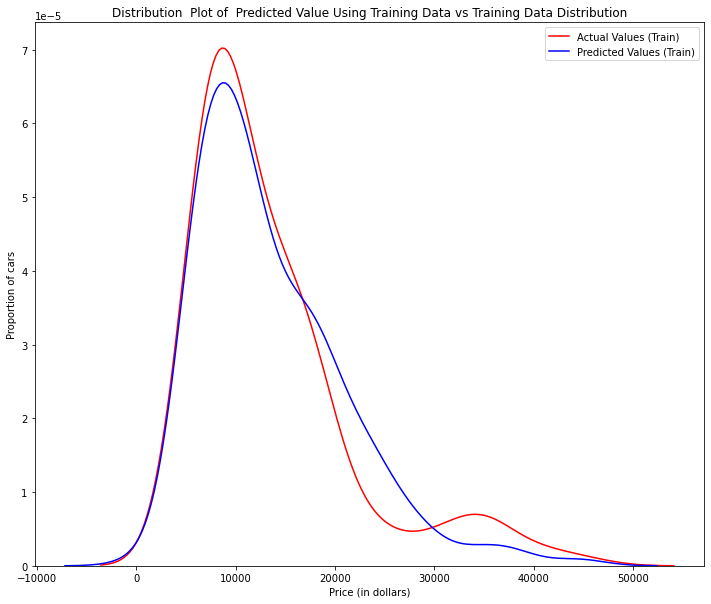

In [46]:
# Let's examine the distribution of the predicted values of the training data:

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, Yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)


# DistributionPlot(Redfunction, BlueFunction, RedName, BlueName, Title)


In [47]:
# So far, the model seems to be doing well in learning from the training dataset. 
# But what happens when the model encounters new data from the testing dataset?
# When the model generates new values from the test data, 
# we see the distribution of the predicted values is much different from the actual target values.

C:\Users\melan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\melan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


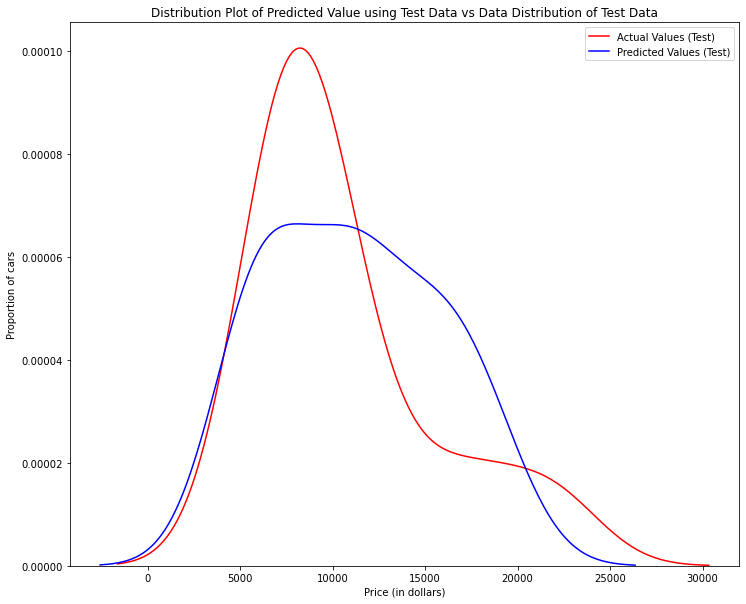

In [48]:
Title = 'Distribution Plot of Predicted Value using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, Yhat_test, "Actual Values (Test)","Predicted Values (Test)",Title)

In [49]:
# Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data.
# This difference in Figure 2 is apparent in the range of 5000 to 15,000.
# This is where the shape of the distribution is extremely different. 
# Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

# import the PolynomialFeatures module preprocessing

In [50]:
from sklearn.preprocessing import PolynomialFeatures

# Overfitting

In [52]:
# Let's use 55 percent of the data for training and the rest for testing:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state= 0) 

In [53]:
# We will perform a degree 5 polynomial transformation on the feature 'horsepower':

pr = PolynomialFeatures(degree =5)

In [54]:
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [55]:
# Now, let's create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [56]:
# We can see the output of our model using the method "predict." We assign the values to "yhat":

Yhat_pr = poly.predict(x_test_pr)
Yhat_pr[0:5]

array([ 6728.63658259,  7307.96945632, 12213.77686795, 18893.28704901,
       19995.99382148])

In [57]:
# Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", Yhat_pr[0:4])
print("Actual values:", y_test[0:4].values)

Predicted values: [ 6728.63658259  7307.96945632 12213.77686795 18893.28704901]
Actual values: [ 6295. 10698. 13860. 13499.]


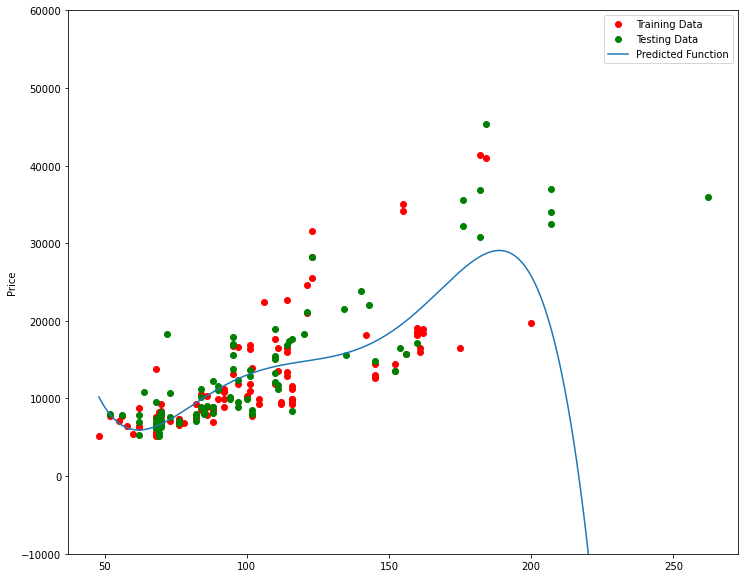

In [58]:
# We will use the function "PollyPlot" that we defined at the beginning of the lab 
# to display the training data, testing data, and the predicted function:

PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)
# PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):

In [59]:
# Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, 
# and the blue line represents the model prediction.
# We see that the estimated function appears to track the data but around 200 horsepower, 
# the function begins to diverge from the data points.

In [60]:
# R² of the training data:
poly.score(x_train_pr, y_train)

0.5567716901586273

In [61]:
# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.871297443750265

In [ ]:
# We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. 
# The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3.1, 0.74, 'Maximum R^2')

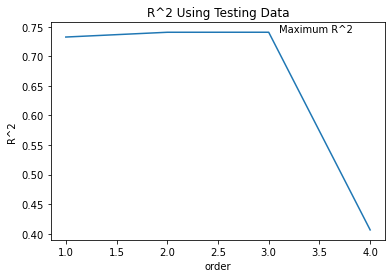

In [63]:
# Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:
# Rsqu = to mention the object R² 
# Step 1: Create an empty list to store the values
Rsqu_test = []

# Step2 :create the list containing different Polynomial orders:
order = [1, 2, 3, 4]

# We then iterate through the list using the loop
for n in order:
    pr = PolynomialFeatures(degree = n) # We create a Polynomial feature object with the order of the Polynomial as a parameter
    
    x_train_pr= pr.fit_transform(x_train[['horsepower']]) # We transform the training & test data into a polynomial using the fit transform method
    
    x_test_pr= pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train) # We fit the regression model using the transform data
    
    Rsqu_test.append(lr.score(x_test_pr, y_test)) # We can calculate the R-squared using the test data and store it in the array
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Testing Data')
plt.text(3.1, 0.74, 'Maximum R^2') # define the coordinate (x, y) where to write the text 'Maximum R^

In [64]:
# We see the R^2 gradually increases until an order three polynomial is used. 
# Then, the R^2 dramatically decreases at an order four polynomial.

In [65]:
# The following function will be used in the next section

In [66]:
def f(order, test_data):
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size = test_data, random_state=0)
    pr= PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr= pr.fit_transform(x_test[['horsepower']])
    poly= LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [67]:
# The following interface allows you to experiment with different polynomial orders and different amounts of data:

In [68]:
interact(f, order =(0, 6,1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

# Exercise

In [69]:
# We can perform polynomial transformations with more than one feature. 
# Create a "PolynomialFeatures" object "pr1" of degree two:

pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures()

In [70]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. 
# Hint: use the method "fit_transform".

x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [71]:
# How many dimensions does the new feature have? Hint: use the attribute "shape":
x_train_pr1.shape  # there are now 15 features

(110, 15)

In [72]:
# Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.

poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

C:\Users\melan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\melan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


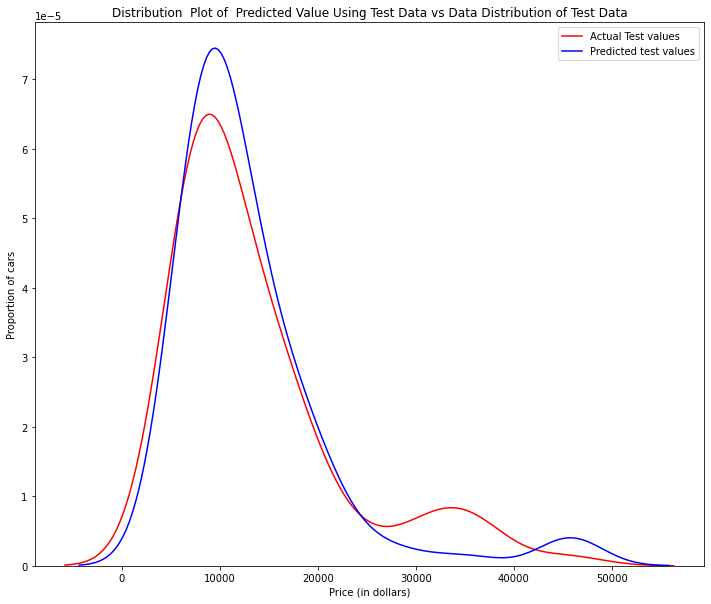

In [73]:
# Use the method "predict" to predict an output on the polynomial features, 
# then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.

Yhat_train1 = poly1.predict(x_train_pr1)
Yhat_test1 = poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test1, Yhat_test1, 'Actual Test values', 'Predicted test values', Title)
# DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):

In [74]:
# Using the distribution plot above, describe (in words) the two regions 
# where the predicted prices are less accurate than the actual prices.

# the predicted value is higher than the actual values for cars where the price $10,000 ranges, 
# conversely, the predicted price is lower than the actual cost in the $30,000 and $40,000 range. 
# as such the model is not that accurate in these ranges. 

# Part 3: Ridge Regression 

In [76]:
# In this section, we will review Ridge Regression and see how the parameter alpha changes the model. 
# Just a note: here our test data will be used as validation data.

In [77]:
# Let's perform a degree two polynomial transformation on our data:

pr= PolynomialFeatures(degree= 2)
x_train_pr= pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr= pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [78]:
# Import the module:
from sklearn.linear_model import Ridge

In [79]:
# Let's create a Ridge regression object, setting the regularization parameter (alpha) to 1:
RidgeModel = Ridge(alpha = 1)

In [80]:
# Like regular regression, you can fit the model using the method fit:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [81]:
# Similarly, you can obtain a prediction:
Yhat = RidgeModel.predict(x_test_pr)

In [82]:
# Let's compare the first five predicted samples to our test set:
print('Predicted values:', Yhat[0:4])
print('Test set:', y_test[0:4].values) # Use .values too have the value, otherwise it gives the features only

Predicted values: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313255]
Test set: [ 6295. 10698. 13860. 13499.]


In [83]:
# We select the value of alpha that minimizes the test error. 
# To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [84]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10* np.array(range(0,1000))
pbar= tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha= alpha)
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.16it/s, Test Score=0.564, Train Score=0.859]


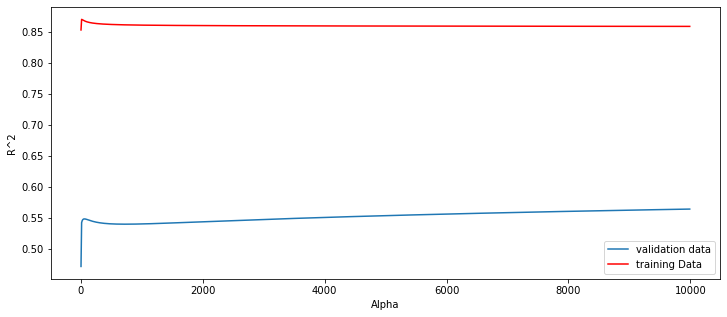

In [85]:
# We can plot out the value of R^2 for different alphas:

plt.figure(figsize=(12,5))

plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [86]:
# Figure 4: The blue line represents the R^2 of the validation data, 
# and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.
# Here the model is built and tested on the same data, so the training and test data are the same

# The red line in Figure 4 represents the R^2 of the training data. 
# As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data.

# The blue line represents the R^2 on the validation data. 
# As the value for alpha increases, the R^2 increases and converges at a point.

# Exercise:

In [88]:
from sklearn.linear_model import Ridge

In [89]:
RidgeModel_1 = Ridge(alpha = 10)
RidgeModel_1.fit(x_train_pr, y_train)

Ridge(alpha=10)

In [90]:
Yhat_1 = RidgeModel_1.predict(x_test_pr)
Yhat_1[0:5]

array([ 6472.05406775,  9537.15585238, 21078.08955884, 19750.77444841,
       21339.40311655])

In [91]:
y_train[0:5].values

array([16925., 18420.,  5389., 19045.,  7775.])

In [92]:
print("The R^2 of the train data is", RidgeModel_1.score(x_train_pr, y_train))
print("The R^2 of the test data is", RidgeModel_1.score(x_test_pr, y_test))

The R^2 of the train data is 0.8706524475732127
The R^2 of the test data is 0.5418576440209077


# Part 4: Grid Search

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
# We create a dictionary of parameter values:
# The value of your Grid Search is a Python list that contains a Python dictionary.
# The key is the name of the free parameter ('alpha')
# The value of the dictionary is the different values of the free parameter.

In [96]:
parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [97]:
# Create a Ridge regression object:
RR = Ridge()
RR

Ridge()

In [105]:
# Create a ridge grid search CV object:
# The inputs are the ridge regression object, the parameter values, and the number of folds.
# We will use R-squared.
Grid1 = GridSearchCV(RR, parameters1, cv=4)


In [106]:
# Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [108]:
# The object finds the best parameter values on the validation data. 
# We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

BestRR= Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [110]:
# We now test our model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036148

In [112]:
# We can also get information like the mean score on the validation data using the attribute CV result.

scores= Grid1.cv_results_
scores['mean_test_score']

array([0.66459248, 0.66459305, 0.66459827, 0.66465008, 0.66513615,
       0.66808959, 0.67249168, 0.6569726 , 0.6569726 ])

# Exercise

In [126]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:
# The term alpha is the first element in the dictionary. The second element is the normalized option.

Parameter2 = [{'alpha': [1, 10, 1000,10000, 100000], 'normalize': [True, False]}]
Parameter2


[{'alpha': [1, 10, 1000, 10000, 100000], 'normalize': [True, False]}]

In [127]:
RR_1 = Ridge()

In [128]:
Grid2 = GridSearchCV(RR, Parameter2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
Grid2.best_estimator_

Ridge(alpha=1, normalize=True)